# Import Packages

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as dr
from matplotlib import rcParams

# Get S&P 500 Data

In [41]:
stock=['^GSPC']
data=dr.get_data_yahoo(stock, start='2019-09-01')['Adj Close']
data

Symbols,^GSPC
Date,
2019-09-03,2906.270020
2019-09-04,2937.780029
2019-09-05,2976.000000
2019-09-06,2978.709961
2019-09-09,2978.429932
...,...
2021-08-30,4528.790039
2021-08-31,4522.680176
2021-09-01,4524.089844


# Get NASDAQ Data

In [42]:
stock1=['^IXIC']
data1=dr.get_data_yahoo(stock1, start='2019-09-01')['Adj Close']
data1

Symbols,^IXIC
Date,
2019-09-03,7874.160156
2019-09-04,7976.879883
2019-09-05,8116.830078
2019-09-06,8103.069824
2019-09-09,8087.439941
...,...
2021-08-30,15265.889648
2021-08-31,15259.240234
2021-09-01,15309.379883


# Get DOW Data

In [43]:
stock2=['^DJI']
data2=dr.get_data_yahoo(stock2, start='2019-09-01')['Adj Close']
data2

Symbols,^DJI
Date,
2019-09-03,26118.019531
2019-09-04,26355.470703
2019-09-05,26728.150391
2019-09-06,26797.460938
2019-09-09,26835.509766
...,...
2021-08-30,35399.839844
2021-08-31,35360.730469
2021-09-01,35312.531250


# Get Stock Data

In [44]:
stocks=['AAPL', 'MSFT', 'AMZN', 'EBAY', 'COKE', 'PEP', 'GOOG', 'FB', 'F', 'GM']
data3 = dr.get_data_yahoo(stocks, start = '2019-09-01')['Adj Close']

#Add S&P 500 data and rename the column "GSPC"
data3['GSPC']=data

#Add NASDAQ data and rename the column "IXIC"
data3['IXIC']=data1

#Add DOW data and rename the column "DJI"
data3['DJI']=data2

data3

Symbols,AAPL,MSFT,AMZN,EBAY,COKE,PEP,GOOG,FB,F,GM,GSPC,IXIC,DJI
Date,,,,,,,,,,,,,
2019-09-03,50.594368,133.285660,1789.839966,38.692806,331.243744,128.853714,1168.390015,182.389999,8.803351,35.719585,2906.270020,7874.160156,26118.019531
2019-09-04,51.452774,134.843491,1800.619995,38.595448,310.488281,130.437866,1181.410034,187.139999,8.900091,37.006691,2937.780029,7976.879883,26355.470703
2019-09-05,52.458755,137.214462,1840.719971,39.724873,303.569824,128.347229,1211.380005,190.899994,9.035527,37.857082,2976.000000,8116.830078,26728.150391
2019-09-06,52.453838,136.283707,1833.510010,39.306206,296.303894,129.659195,1204.930054,187.490005,9.035527,37.905952,2978.709961,8103.069824,26797.460938
2019-09-09,52.677666,134.735703,1831.349976,40.309074,290.288727,128.743652,1204.410034,188.759995,9.229008,38.687923,2978.429932,8087.439941,26835.509766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30,153.119995,303.589996,3421.570068,77.370003,401.000000,154.938004,2909.389893,380.660004,13.050000,49.169998,4528.790039,15265.889648,35399.839844
2021-08-31,151.830002,301.880005,3470.790039,76.739998,406.160004,155.325348,2909.239990,379.380005,13.030000,49.009998,4522.680176,15259.240234,35360.730469
2021-09-01,152.509995,301.829987,3479.000000,76.150002,407.720001,156.835007,2916.840088,382.049988,13.110000,49.110001,4524.089844,15309.379883,35312.531250


# Get Sector Data

In [45]:
sector=['^SP500-45']
data4=dr.get_data_yahoo(sector, start='2019-09-01')['Adj Close']
data4.rename(columns={'^SP500-45':'InfoTech'},inplace=True)
data4


Symbols,InfoTech
Date,
2021-09-03,2796.120117


In [46]:
sectors=['XLE','XLB','XLI','XLY','XLP','XLV','XLF','SMH','XTL','XLU','IYR']
data5=dr.get_data_yahoo(sectors, start='2019-09-01')['Adj Close']
data5.rename(columns={'XLE':'Energy',
                      'XLB':'Materials', 
                      'XLI':'Industrial',
                      'XLY':'ConsDisc',
                      'XLP':'ConsStaple',
                      'XLV':'Health',
                      'XLF':'Financial',
                      'SMH':'InfoTech',
                      'XTL':'Communication',
                      'XLU':'Utilities',
                      'IYR':'RealEstate'
                     },inplace=True)
data5

Symbols,Energy,Materials,Industrial,ConsDisc,ConsStaple,Health,Financial,InfoTech,Communication,Utilities,RealEstate
Date,,,,,,,,,,,
2019-09-03,50.052628,53.987320,72.041000,116.636108,57.878708,86.600914,25.488770,110.177429,64.942230,59.627293,88.247002
2019-09-04,50.752655,54.649685,72.956795,117.791817,58.399967,86.658607,25.737532,113.425705,65.432953,59.683464,88.937019
2019-09-05,51.382698,54.736073,74.267868,120.044418,58.039822,87.514328,26.263767,116.869667,66.463478,59.037487,88.379333
2019-09-06,51.653957,54.947266,74.422119,120.338242,58.229374,87.754692,26.254200,116.967522,66.649956,58.803432,88.549484
2019-09-09,52.686512,54.659279,74.643845,120.798553,58.096695,86.947052,26.656050,117.417572,66.649956,58.513203,87.972893
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30,48.730000,85.860001,104.800003,183.210007,72.099998,135.389999,38.450001,272.899994,102.629997,68.620003,108.279999
2021-08-31,48.400002,85.610001,104.510002,183.649994,72.260002,135.210007,38.400002,270.829987,101.330002,68.540001,108.790001
2021-09-01,47.689999,85.389999,104.110001,183.639999,72.639999,135.250000,38.180000,270.410004,101.070000,69.440002,110.750000


# Plot the Data

## Apple vs Microsoft

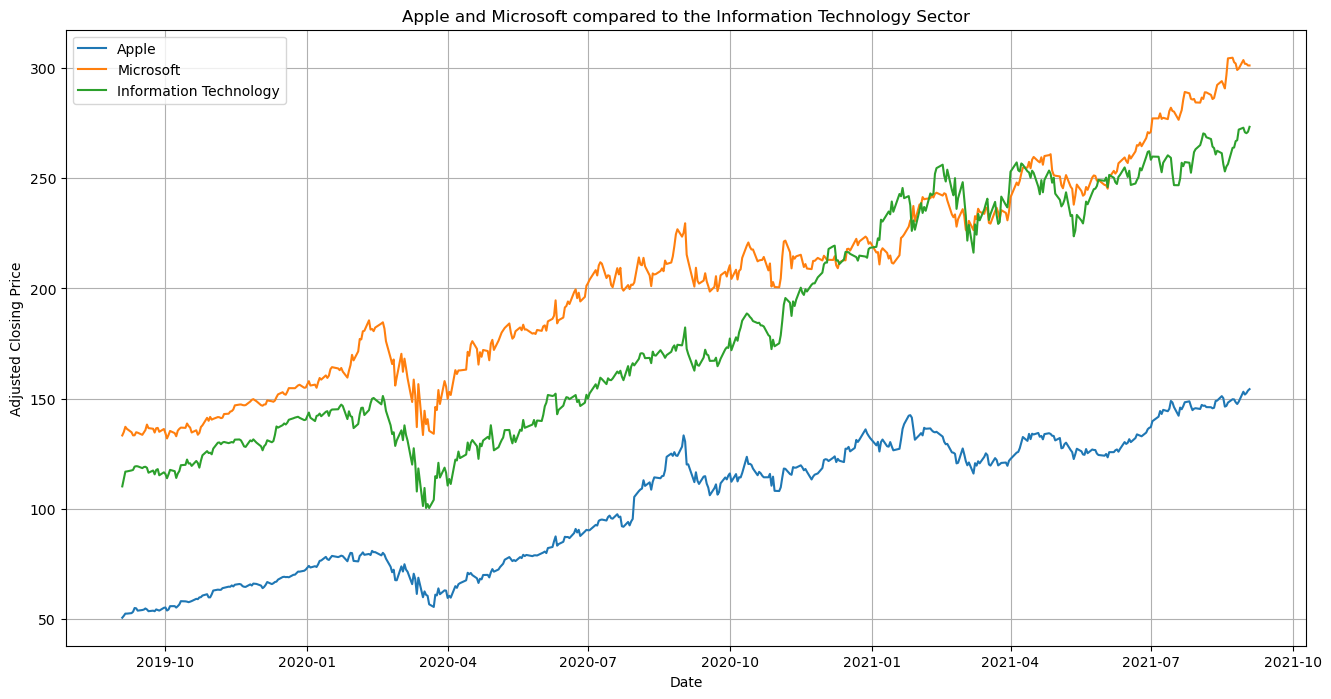

In [53]:
rcParams['figure.figsize'] = 16,8
plt.plot(data3.AAPL, label='Apple')
plt.plot(data3.MSFT, label='Microsoft')
plt.plot(data5.InfoTech, label='Information Technology')
plt.title("Apple and Microsoft compared to the Information Technology Sector")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

## Amazon vs eBay

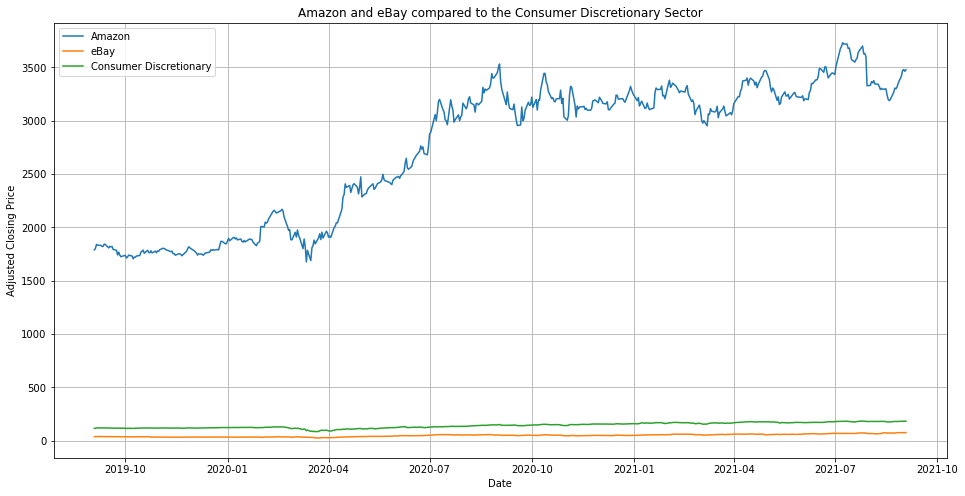

In [21]:
rcParams['figure.figsize'] = 16,8
plt.plot(data3.AMZN, label='Amazon')
plt.plot(data3.EBAY, label='eBay')
plt.plot(data5.ConsDisc, label='Consumer Discretionary')
plt.title("Amazon and eBay compared to the Consumer Discretionary Sector")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

## Coca-Cola vs Pepsi

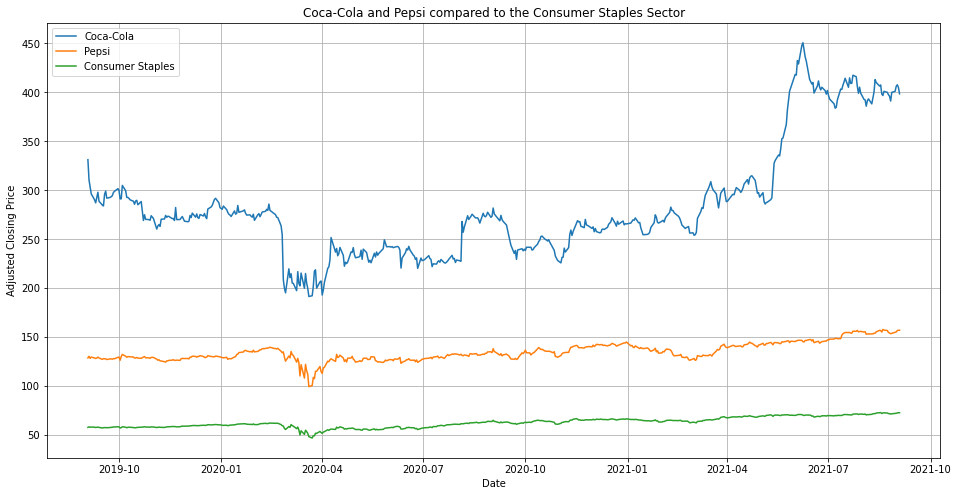

In [26]:
rcParams['figure.figsize'] = 16,8
plt.plot(data3.COKE, label='Coca-Cola')
plt.plot(data3.PEP, label='Pepsi')
plt.plot(data5.ConsStaple, label='Consumer Staples')
plt.title("Coca-Cola and Pepsi compared to the Consumer Staples Sector")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

## Google vs FaceBook

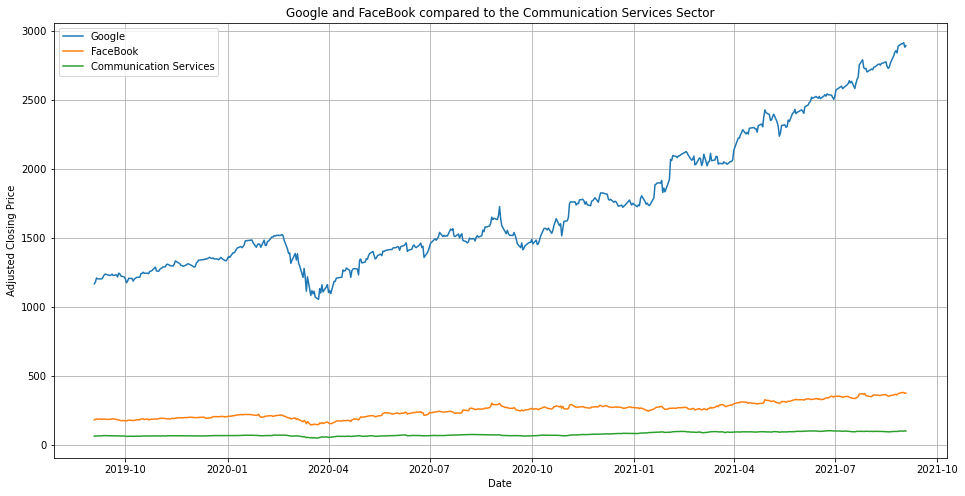

In [24]:
rcParams['figure.figsize'] = 16,8
plt.plot(data3.GOOG, label='Google')
plt.plot(data3.FB, label='FaceBook')
plt.plot(data5.Communication, label='Communication Services')
plt.title("Google and FaceBook compared to the Communication Services Sector")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

## Ford vs GM

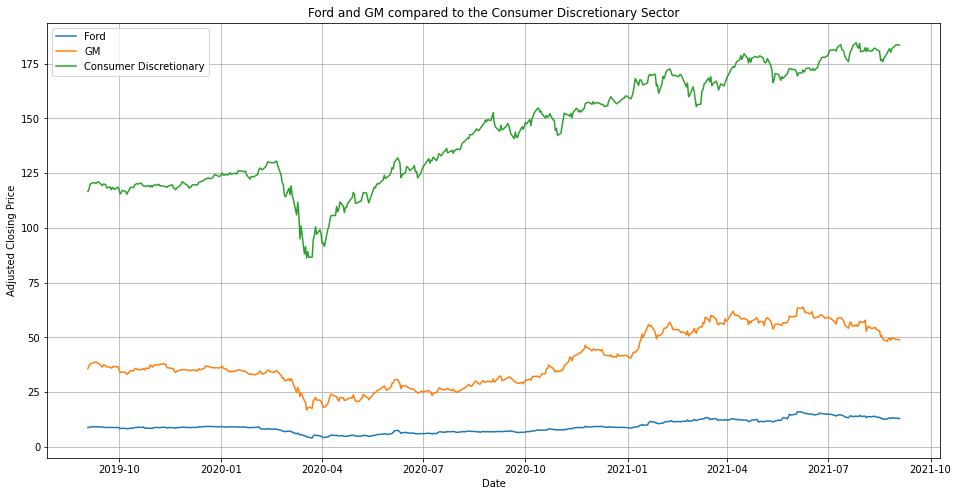

In [25]:
rcParams['figure.figsize'] = 16,8
plt.plot(data3.F, label='Ford')
plt.plot(data3.GM, label='GM')
plt.plot(data5.ConsDisc, label='Consumer Discretionary')
plt.title("Ford and GM compared to the Consumer Discretionary Sector")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

## Sectors

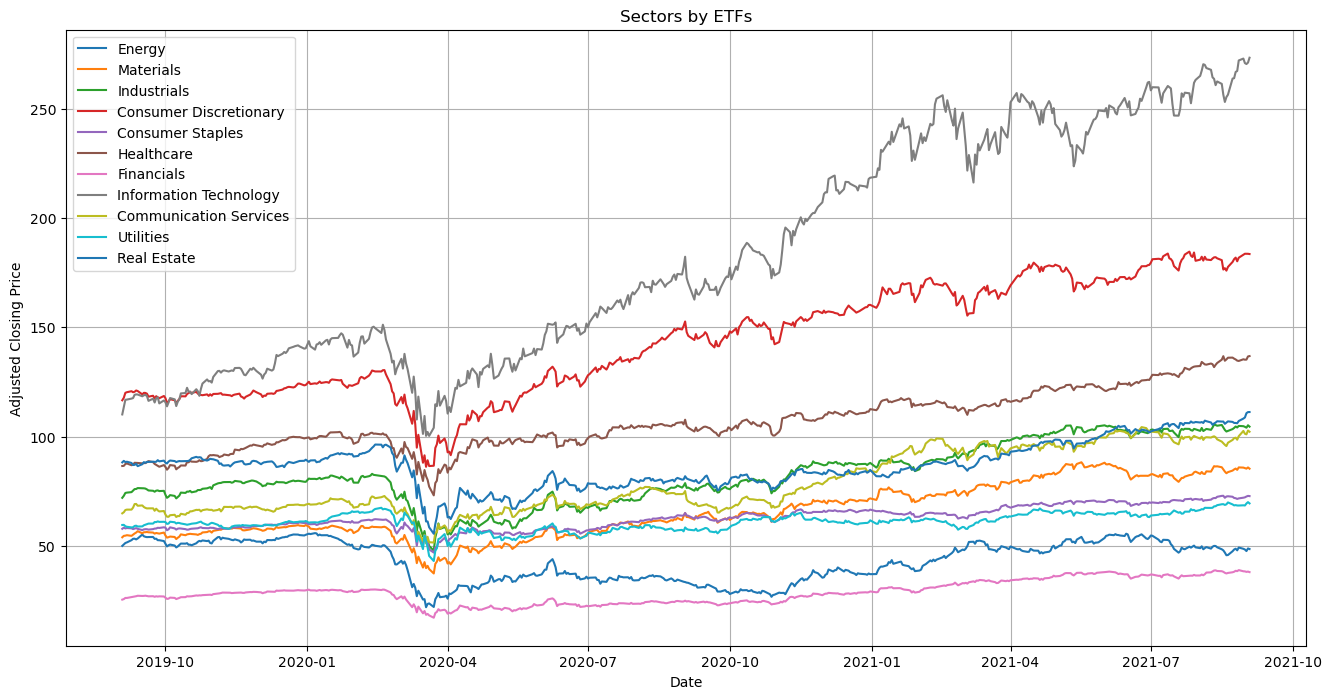

In [54]:
rcParams['figure.figsize'] = 16,8
plt.plot(data5.Energy, label='Energy')
plt.plot(data5.Materials, label='Materials')
plt.plot(data5.Industrial, label='Industrials')
plt.plot(data5.ConsDisc, label='Consumer Discretionary')
plt.plot(data5.ConsStaple, label='Consumer Staples')
plt.plot(data5.Health, label='Healthcare')
plt.plot(data5.Financial, label='Financials')
plt.plot(data5.InfoTech, label='Information Technology')
plt.plot(data5.Communication, label='Communication Services')
plt.plot(data5.Utilities, label='Utilities')
plt.plot(data5.RealEstate, label='Real Estate')
plt.title("Sectors by ETFs")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);